In [36]:
from os.path import split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [37]:
df = pd.read_csv('data/Filosofi2017_carreaux_200m_met.csv', low_memory=False)
df.drop(['Idcar_200m', 'Idcar_1km', 'I_est_1km', 'Idcar_nat', 'lcog_geo'], axis=1, inplace=True)
df = df.sample(frac=0.01, random_state=42)
df

,I_est_200,Groupe,Ind,Men_1ind,Men_5ind,Men_prop,Men_fmp,Ind_snv,Men_surf,Men_coll,...,Ind_11_17,Ind_18_24,Ind_25_39,Ind_40_54,Ind_55_64,Ind_65_79,Ind_80p,Ind_inc,Men_pauv,Men
924519,1,619516,5.0,0.3,0.1,1.6,0.2,204677.3,219.3,0.0,...,0.2,0.3,1.3,1.1,0.6,0.2,0.0,0.0,0.1,1.8
579635,0,536095,60.0,9.0,3.0,18.0,2.0,1206442.8,2582.0,8.0,...,9.0,6.0,7.0,13.0,7.0,4.0,9.0,0.0,3.0,24.0
586854,1,226038,1.0,0.1,0.0,0.3,0.0,20982.7,46.0,0.0,...,0.2,0.0,0.1,0.3,0.1,0.2,0.1,0.0,0.0,0.4
930208,1,620340,18.0,2.1,0.2,7.8,0.8,485230.7,915.4,0.6,...,0.9,0.2,2.8,1.9,4.8,4.6,1.5,0.0,0.4,8.8
1541800,1,773554,8.0,0.8,0.3,3.1,0.4,175654.8,425.4,0.1,...,0.7,0.8,0.7,2.1,0.6,1.6,0.4,0.0,0.3,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573245,0,782355,190.5,50.0,3.0,9.0,23.0,3255147.4,7226.0,91.0,...,20.0,8.0,47.0,35.0,30.0,11.0,8.0,0.0,18.0,102.0
348890,1,500403,5.0,0.4,0.1,1.9,0.2,128507.7,236.8,0.0,...,0.5,0.4,0.5,1.1,0.7,1.0,0.4,0.0,0.1,2.0
618711,1,543848,6.0,0.7,0.2,2.0,0.1,107918.9,305.7,0.2,...,0.4,0.1,0.5,1.4,0.8,1.5,0.6,0.0,0.9,2.7
1356582,1,302108,2.0,0.1,0.1,0.6,0.1,41102.9,92.9,0.0,...,0.2,0.2,0.4,0.3,0.4,0.0,0.1,0.0,0.0,0.7


In [38]:
X = StandardScaler().fit_transform(df)

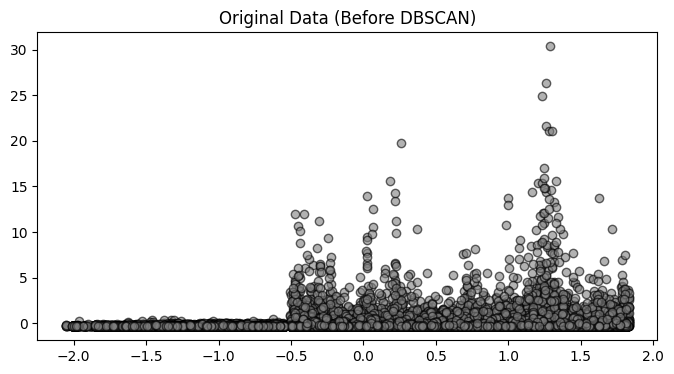

In [39]:
plt.figure(figsize=(8, 4))
plt.scatter(X[:, 1], X[:, 2], c='gray', alpha=0.6, edgecolors='k')
plt.title("Original Data (Before DBSCAN)")
plt.show()

In [40]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X)

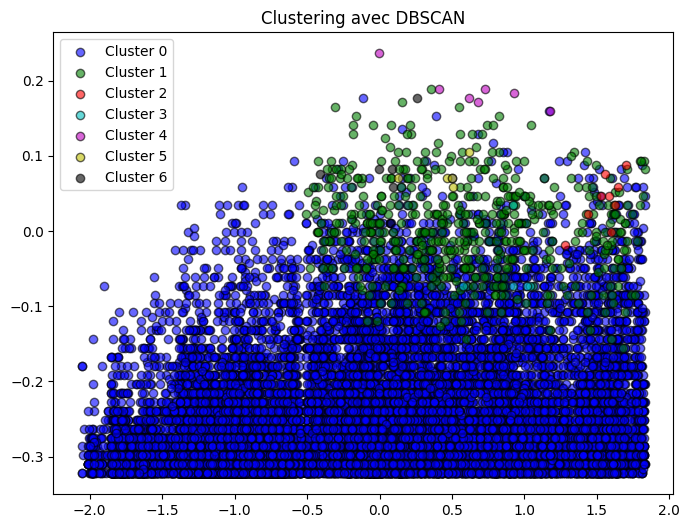

In [41]:
plt.figure(figsize=(8, 6))
unique_labels = set(labels)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for label, color in zip(unique_labels, colors):
    cluster_points = X[labels == label]
    plt.scatter(cluster_points[:, 1], cluster_points[:, 2], c=color, label=f'Cluster {label}', alpha=0.6, edgecolors='k')

plt.title("Clustering avec DBSCAN")
plt.legend()
plt.show()

In [42]:
intertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    intertias.append(kmeans.inertia_)

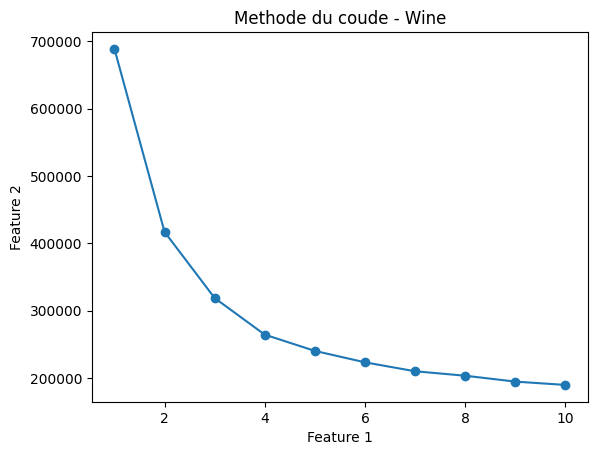

In [43]:
plt.plot(k_range, intertias, marker='o')
plt.title('Methode du coude - Wine')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [44]:
optimal_k = 5

In [45]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

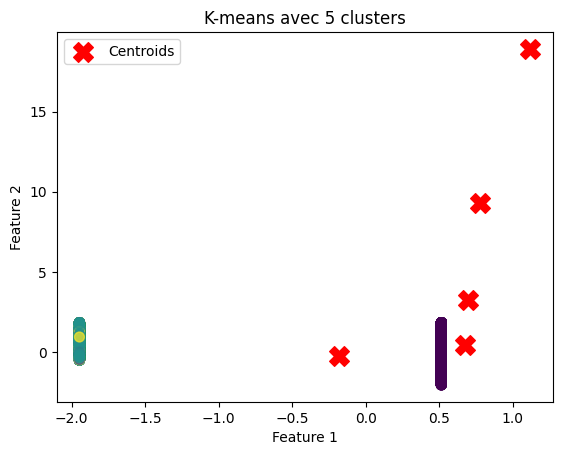

In [46]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centroids[:, 1], centroids[:, 2], c='red', marker='X', s=200, label="Centroids")
plt.title(f"K-means avec {optimal_k} clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [47]:
df = pd.DataFrame(X, columns=df.columns)
df['Cluster'] = labels
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         I_est_200    Groupe        Ind   Men_1ind   Men_5ind   Men_prop  \
Cluster                                                                    
0         0.508260 -0.179213  -0.250856  -0.201789  -0.189801  -0.284027   
1        -1.947772  0.779102   9.309105   7.784272   9.819288   5.441599   
2        -1.930251  0.676466   0.458878   0.264647   0.303971   0.698195   
3        -1.947772  1.118805  18.913063  18.875989  15.483609  15.974332   
4        -1.947772  0.691665   3.232372   3.373604   2.257253   3.209050   

           Men_fmp    Ind_snv   Men_surf   Men_coll  ...  Ind_11_17  \
Cluster                                              ...              
0        -0.212907  -0.225026  -0.283175  -0.148390  ...  -0.237452   
1         9.409092   7.568852   8.319381   9.266377  ...   9.402531   
2         0.298890   0.420537   0.602967   0.038486  ...   0.457238   
3        16.176472  22.388322  17.518585  20.868602  ...  16.424681   
4         3.274803   2.782028   3.431510 